# Churn Prediction

In [5]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Finding Data Shape

df.shape

(10000, 14)

In [9]:
# Checking Data Features Info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Preprocessing

In [10]:
# Checking for Duplicates.

df.duplicated().sum()

np.int64(0)

In [11]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
# Dropping out UnImportant Columns

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [13]:
# Encoding for Categorical Data.

df = pd.get_dummies(df,columns = ['Geography','Gender'], drop_first=True)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


## Train/Test Split

In [15]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [18]:
X_train.shape

(8000, 11)

## Scaling Values

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

## Training Model

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Tells the summary of our Neural Network.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Model Compilation

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
# Model Fitting / Training
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7109 - loss: 0.5820 - val_accuracy: 0.7975 - val_loss: 0.4778
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4651 - val_accuracy: 0.7981 - val_loss: 0.4500
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8066 - loss: 0.4316 - val_accuracy: 0.8062 - val_loss: 0.4376
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8191 - loss: 0.4204 - val_accuracy: 0.8075 - val_loss: 0.4297
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8206 - loss: 0.4240 - val_accuracy: 0.8131 - val_loss: 0.4244
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8232 - loss: 0.4174 - val_accuracy: 0.8194 - val_loss: 0.4176
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8292 - loss: 0.4134 - val_accuracy: 0.8238 - val_loss: 0.4081
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8361 - loss: 0.3890 - val_accu

In [33]:
# Model Parameters (2nd Layer)

model.layers[2].get_weights()

[array([[-0.9340749 ],
        [-0.43559787],
        [-0.8085083 ],
        [ 1.0331627 ],
        [-0.72979265],
        [-0.4189088 ],
        [ 0.8345788 ],
        [ 1.6674018 ],
        [ 0.97452694],
        [ 0.6996232 ],
        [-0.44958118]], dtype=float32),
 array([-0.06422815], dtype=float32)]

In [27]:
# Predicting Values for Test Data
# In decimals becoz of Sigmoid

y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [28]:
# Setting Threshold as 0.5.
# So if y_pred>0.5 --> 1 else --> 0

y_pred = np.where(y_log>0.5,1,0)

In [29]:
# Accuracy Score

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

## Drawing Graph for out Model Training

In [30]:
import matplotlib.pyplot as plt

In [31]:
history.history

{'accuracy': [0.7678124904632568,
  0.7971875071525574,
  0.8040624856948853,
  0.8159375190734863,
  0.8196874856948853,
  0.8243749737739563,
  0.8295312523841858,
  0.8334375023841858,
  0.8399999737739563,
  0.8475000262260437,
  0.8528125286102295,
  0.8548437356948853,
  0.854687511920929,
  0.8557812571525574,
  0.8568750023841858,
  0.8582812547683716,
  0.8584374785423279,
  0.8596875071525574,
  0.8578125238418579,
  0.8607812523841858,
  0.8584374785423279,
  0.8592187762260437,
  0.8606250286102295,
  0.8609374761581421,
  0.8614062666893005,
  0.8629687428474426,
  0.8628125190734863,
  0.8643749952316284,
  0.862500011920929,
  0.8639062643051147,
  0.8650000095367432,
  0.86328125,
  0.8651562333106995,
  0.8631250262260437,
  0.8653125166893005,
  0.8651562333106995,
  0.8645312786102295,
  0.8634374737739563,
  0.8651562333106995,
  0.8654687404632568,
  0.8642187714576721,
  0.8646875023841858,
  0.864062488079071,
  0.8656250238418579,
  0.8668749928474426,
  0.86578

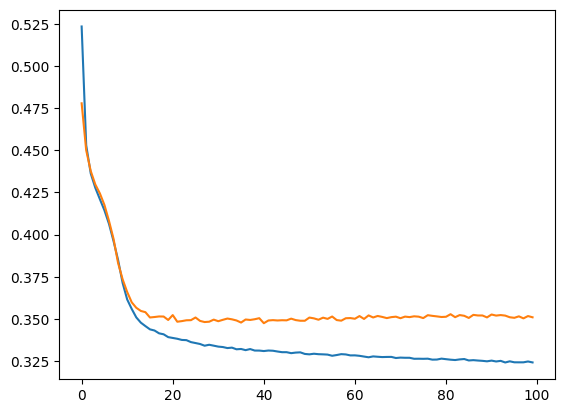

In [34]:
# Graph Comparison b/w loss and val_loss.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

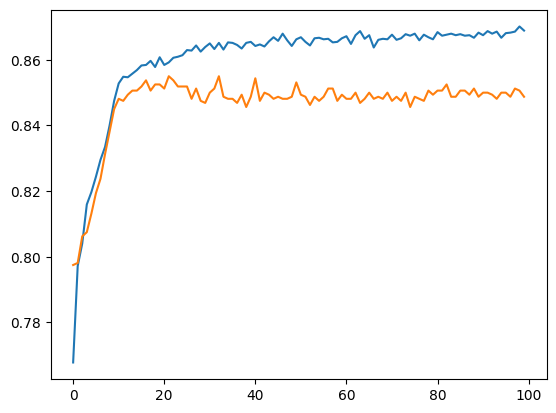

In [35]:
# Graph Comparison b/w accuracy and val_accuracy.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])